**GROUP PROJECT**

**Visualization 1 - Muhammad Syahmi**

For Visualization 1, we will present **Total of movies Released according to Genre** in Pie Chart form.

In [236]:
import numpy as np
import pandas as pd
import seaborn as sns
import re,unicodedata,string
import matplotlib.pyplot as plt
import json
import nltk
import csv
from string import punctuation
from os import path
from PIL import Image
from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from keras.models import Sequential
from keras.layers import Dense
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer
%matplotlib inline

1. Read the csv file 

In [237]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


2. Removing rows which is not movie.

In [238]:
df.drop(df.loc[df['type']!='Movie'].index, inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...
5580,80064521,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,"April 1, 2016",2015,PG-13,109 min,Documentaries,The journey of fashion designer Jeremy Scott f...


3. Removing all rows with null value and removing string from "duration" column and only leaving number

In [239]:
df.dropna(inplace= True)
df = df.assign(duration = lambda x: x['duration'].str.extract('(\d+)'))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


4. Removing days and years, leaving on month in column "date_added"

In [240]:
month = df['date_added'].str.split(pat = ' [1-9]',n = 1, expand = True)
df['date_added'] = month[0]
df['duration'] = pd.to_numeric(df['duration'])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",September,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,September,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",September,2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,September,2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",September,2014,R,90,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


5. Split the data in column "listed_in" which represent genre

In [241]:
genresplit = df['listed_in'].str.split(pat = ",", expand = True)
genresplit[3] = genresplit[0]
a = genresplit.groupby([0]).count()
genresplit

,0,1,2,3
0,Children & Family Movies,Comedies,None,Children & Family Movies
4,Comedies,None,None,Comedies
6,International Movies,Sci-Fi & Fantasy,Thrillers,International Movies
7,Stand-Up Comedy,None,None,Stand-Up Comedy
9,Action & Adventure,Thrillers,None,Action & Adventure
...,...,...,...,...
5574,Dramas,International Movies,None,Dramas
5575,Dramas,International Movies,Thrillers,Dramas
5578,Comedies,Dramas,Independent Movies,Comedies
5579,Documentaries,Sports Movies,None,Documentaries


6. Plot the graf of **Total of movies Released according to Genre**

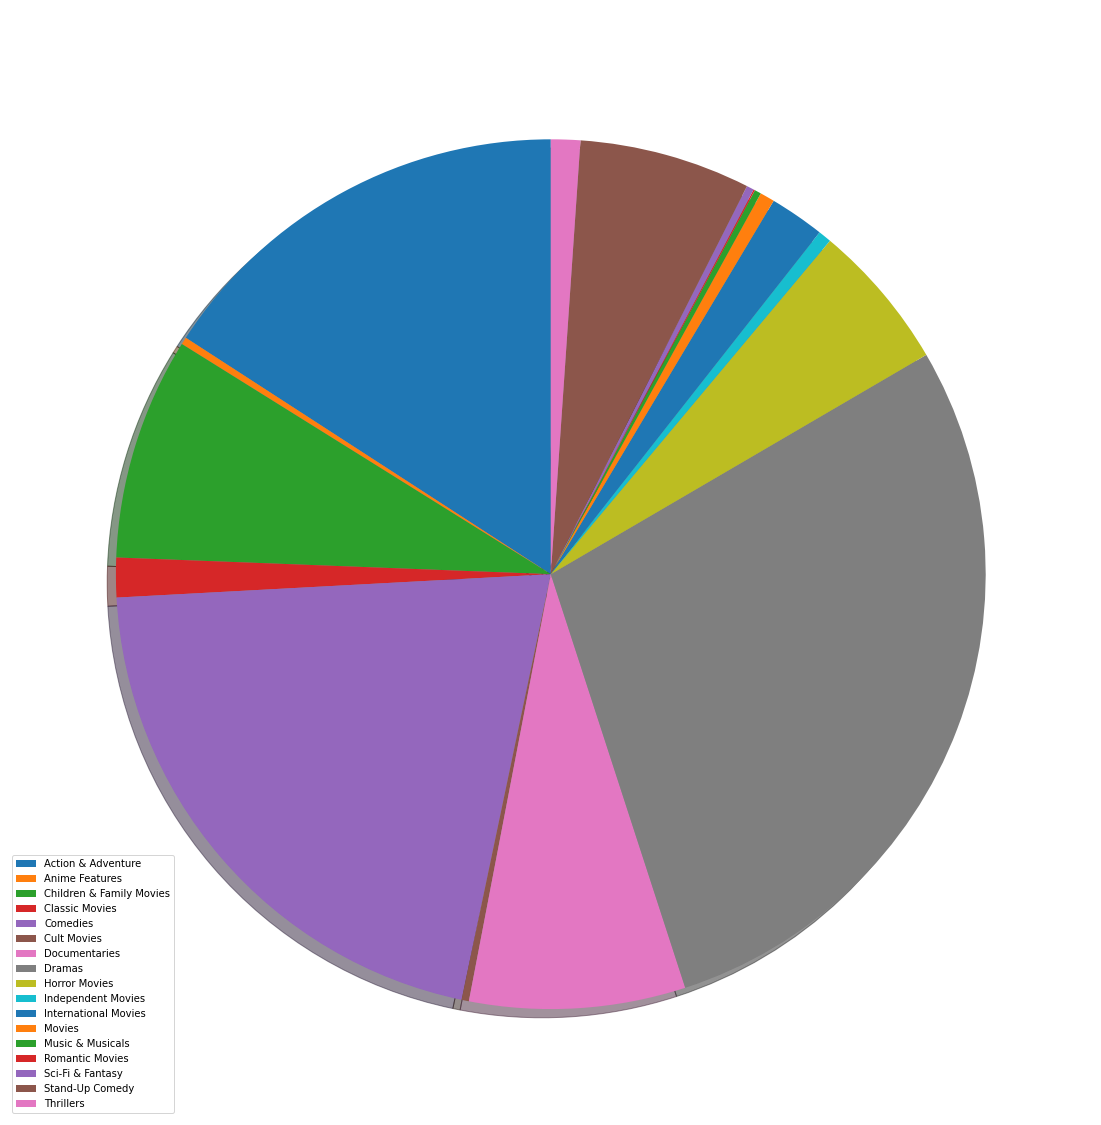

In [242]:
fig , axes = plt.subplots(figsize =(20,20))
month = a.index
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 24,
        }
myexplode = [0,0,0,0,0,0,0,0,0,0.1,0,0,0,0,0,0,0]
box = plt.pie(a[3], startangle = 90,shadow = True)
plt.legend(month, loc = 3,)
plt.title("Total of movies Released according to Genre",  fontdict = font);

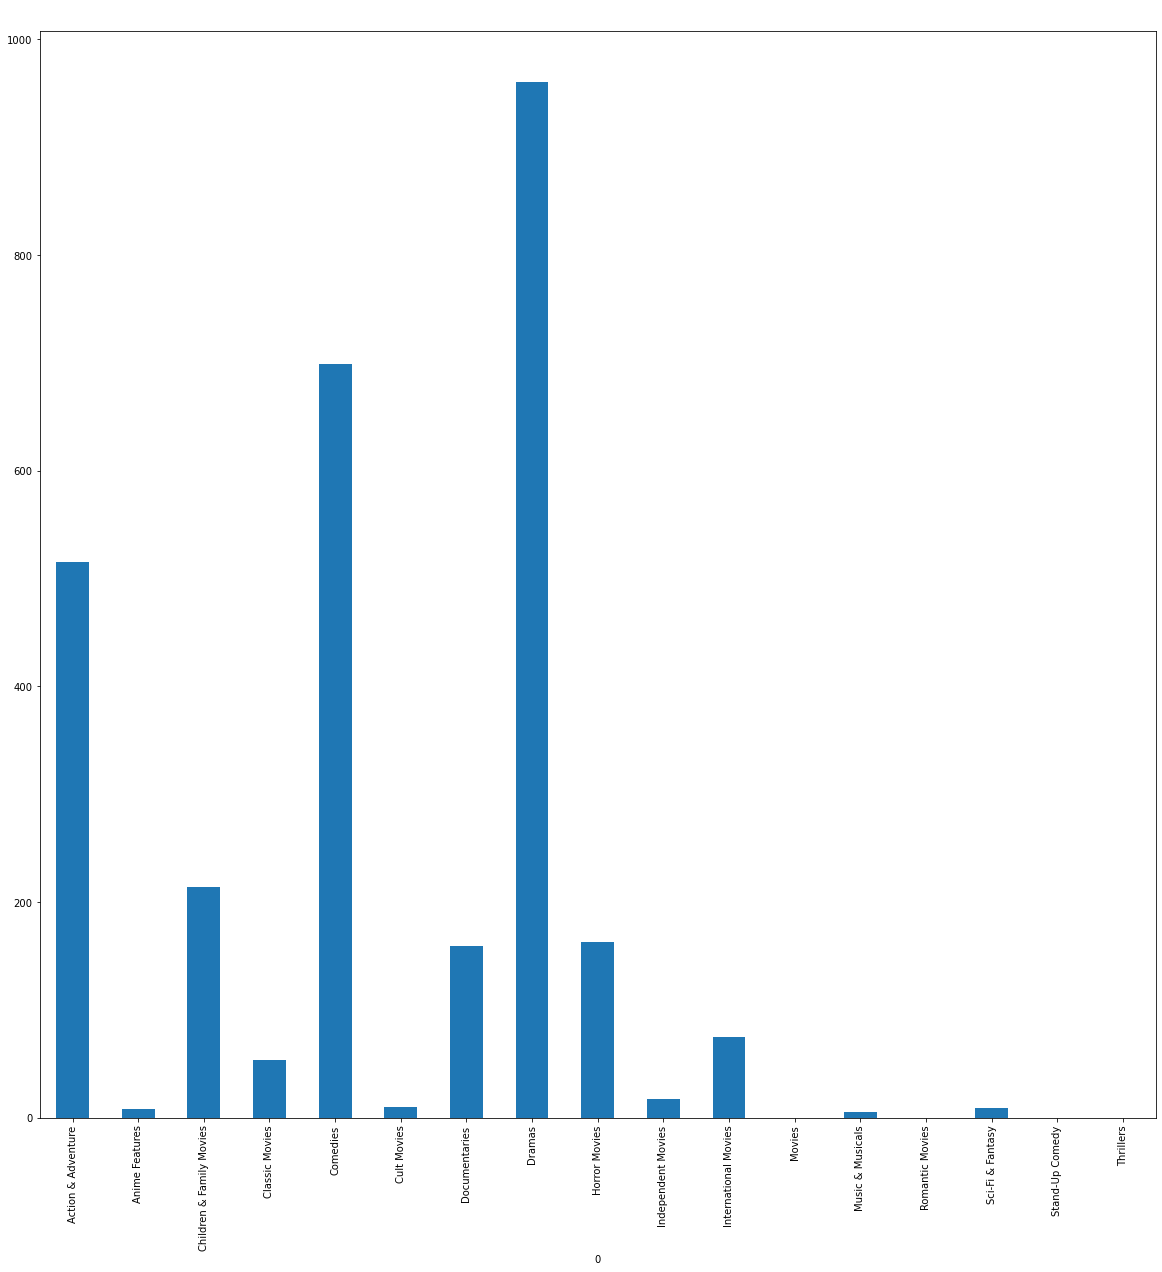

In [243]:
fig , axes = plt.subplots(figsize =(20,20))
a[1].plot.bar()

font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 24,
        }
plt.title("Total of movies Released according to Genre",  fontdict = font);

**Visualization 2 - Syarifah**

For Visualization 2, we will present **Rating based on sum of Top 3 Country** in Bar Chart form.

1. Call the **df** dataframe from visualization 1

In [244]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",September,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,September,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",September,2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,September,2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",September,2014,R,90,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
...,...,...,...,...,...,...,...,...,...,...,...,...
5574,80104237,Movie,The Tenth Man,Daniel Burman,"Alan Sabbagh, Julieta Zylberberg, Usher Barilk...",Argentina,April,2016,TV-MA,81,"Dramas, International Movies",After spending much of his adult life in New Y...
5575,80093107,Movie,Toro,Kike Maíllo,"Mario Casas, Luis Tosar, José Sacristán, Claud...",Spain,April,2016,NR,106,"Dramas, International Movies, Thrillers",Ex-con Toro's brother and former partner in cr...
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,April,2015,R,102,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,April,2014,NR,88,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...


2. Drop out all the rows that contain NaN values

In [245]:
cleaned = df.dropna()
cleaned

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",September,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,September,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",September,2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,September,2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",September,2014,R,90,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
...,...,...,...,...,...,...,...,...,...,...,...,...
5574,80104237,Movie,The Tenth Man,Daniel Burman,"Alan Sabbagh, Julieta Zylberberg, Usher Barilk...",Argentina,April,2016,TV-MA,81,"Dramas, International Movies",After spending much of his adult life in New Y...
5575,80093107,Movie,Toro,Kike Maíllo,"Mario Casas, Luis Tosar, José Sacristán, Claud...",Spain,April,2016,NR,106,"Dramas, International Movies, Thrillers",Ex-con Toro's brother and former partner in cr...
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,April,2015,R,102,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,April,2014,NR,88,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...


3. Group by the data by rating and country, and calculate the sum of country in each rating

In [246]:
countrysplit = cleaned['country'].str.split(pat = ",", expand = True)
countrysplit['rating'] = df['rating']
a = countrysplit.groupby(['rating' , 0]).count()
a["sum"] = a.sum(axis=1)
a

1  2  3  4  5  6  sum
rating 0                                    
G      Canada          1  1  0  0  0  0    2
       France          1  1  1  1  0  0    4
       Germany         1  0  0  0  0  0    1
       South Korea     1  0  0  0  0  0    1
       Spain           1  1  0  0  0  0    2
...                   .. .. .. .. .. ..  ...
UR     Brazil          1  0  0  0  0  0    1
       France          0  0  0  0  0  0    0
       India           0  0  0  0  0  0    0
       United Kingdom  1  0  0  0  0  0    1
       United States   1  0  0  0  0  0    1

[278 rows x 7 columns]

4. Drop the columns **1,2,3,4,5,6** which represent the count and only take the column **sum**

In [247]:
a = a.drop(columns=[1,2,3,4,5,6])
a 

sum
rating 0                  
G      Canada            2
       France            4
       Germany           1
       South Korea       1
       Spain             2
...                    ...
UR     Brazil            1
       France            0
       India             0
       United Kingdom    1
       United States     1

[278 rows x 1 columns]

5. Sort the sum in ascending order and only take the top 3 country for each rating

In [248]:
b = a.groupby(level=[0,1]).sum().reset_index().sort_values(['rating', 'sum'], ascending=[1,0]).groupby('rating').head(3)
b

,rating,0,sum
1,G,France,4
0,G,Canada,2
4,G,Spain,2
7,NC-17,France,2
35,NR,United Kingdom,6
14,NR,Chile,5
17,NR,Denmark,5
50,PG,United States,45
41,PG,France,11
49,PG,United Kingdom,11


6. Rename the column 0 to country

In [249]:
b.rename(columns = { 0 :'country'}, inplace = True)
b

,rating,country,sum
1,G,France,4
0,G,Canada,2
4,G,Spain,2
7,NC-17,France,2
35,NR,United Kingdom,6
14,NR,Chile,5
17,NR,Denmark,5
50,PG,United States,45
41,PG,France,11
49,PG,United Kingdom,11


7. Plot the bar graph of **Rating based on sum of Top 3 Country**

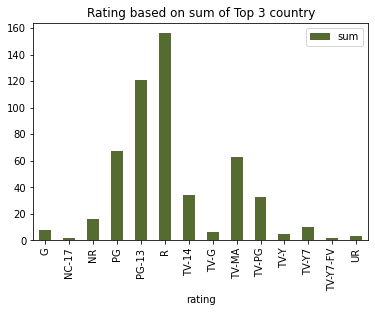

In [250]:
g= b.groupby(['rating'])[['country','sum']].sum()
g.plot.bar(title="Rating based on sum of Top 3 country", color="darkolivegreen");

**Visualization 3 - Hilman**

For Visualization 3, we will present **Average Duration of Each Genre** in Bar Chart form.

1. Call the **df** dataframe from visualization 1

In [251]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",September,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,September,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",September,2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,September,2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",September,2014,R,90,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
...,...,...,...,...,...,...,...,...,...,...,...,...
5574,80104237,Movie,The Tenth Man,Daniel Burman,"Alan Sabbagh, Julieta Zylberberg, Usher Barilk...",Argentina,April,2016,TV-MA,81,"Dramas, International Movies",After spending much of his adult life in New Y...
5575,80093107,Movie,Toro,Kike Maíllo,"Mario Casas, Luis Tosar, José Sacristán, Claud...",Spain,April,2016,NR,106,"Dramas, International Movies, Thrillers",Ex-con Toro's brother and former partner in cr...
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,April,2015,R,102,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,April,2014,NR,88,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...


2. Keeping the first column of genre and rename into "Genre"

In [252]:
genresplit = df['listed_in'].str.split(",",n=3, expand = True)
genresplit = genresplit.rename(columns={0: 'Genre', 1: 'no1', 2:'no2'})
genresplit = genresplit.drop(columns=['no1','no2'])
genresplit['duration'] = df['duration']
genresplit['Genre'] = genresplit['Genre'].astype('str') 
genresplit[['duration']] = genresplit[['duration']].apply(pd.to_numeric)

genresplit.dtypes

Genre       object
duration     int64
dtype: object

3. Displaying the average duration based on genre

In [253]:
avgdura = genresplit
avgdura = avgdura.drop_duplicates(keep='last')
avgdura.groupby('Genre').mean().reset_index()
avgdura = genresplit.groupby('Genre').mean()
avgdura = avgdura.rename(columns={'duration': 'Average Duration of Each Genre'})
avgdura['Average Duration of Each Genre'] = avgdura['Average Duration of Each Genre'].apply(lambda x: round(x, 2))
avgdura.reset_index(level=0, inplace=True)

avgdura

,Genre,Average Duration of Each Genre
0,Action & Adventure,114.26
1,Anime Features,96.60
2,Children & Family Movies,83.42
3,Classic Movies,117.19
4,Comedies,106.57
5,Cult Movies,104.50
6,Documentaries,84.43
7,Dramas,112.42
8,Horror Movies,96.62
9,Independent Movies,97.00


4. Plot the bar graph of **Average Duration of Each Genre**

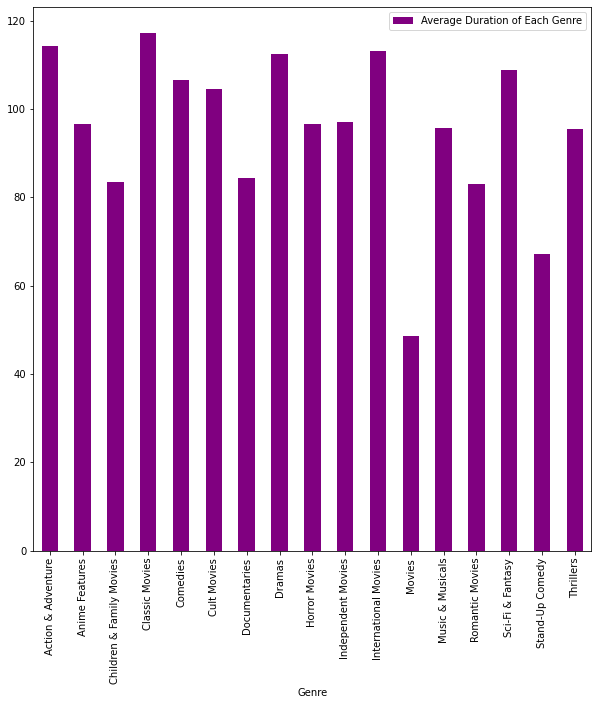

In [254]:
avgdura.plot.bar(x= 'Genre', y = 'Average Duration of Each Genre', color='purple', figsize=(10,10));

Machine Learning

In [255]:


movies = pd.DataFrame()
movies['Title'] = df['title']
movies['Description'] = df['description']
movies['rating'] = df['rating']
movies

,Title,Description,rating
0,Norm of the North: King Sized Adventure,Before planning an awesome wedding for his gra...,TV-PG
4,#realityhigh,When nerdy high schooler Dani finally attracts...,TV-14
6,Automata,"In a dystopian future, an insurance adjuster f...",R
7,Fabrizio Copano: Solo pienso en mi,Fabrizio Copano takes audience participation t...,TV-MA
9,Good People,A struggling couple can't believe their luck w...,R
...,...,...,...
5574,The Tenth Man,After spending much of his adult life in New Y...,TV-MA
5575,Toro,Ex-con Toro's brother and former partner in cr...,NR
5578,Frank and Cindy,A student filmmaker vengefully turns his camer...,R
5579,Iverson,This unfiltered documentary follows the rocky ...,NR


In [256]:
text = " ".join(desc for desc in movies.Description)
print ("There are {} words in the combination of all desc.".format(len(text)))

There are 530496 words in the combination of all desc.


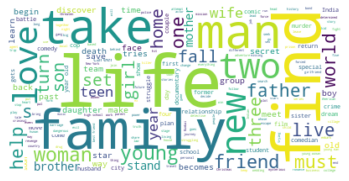

In [257]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["the", "a", "is", "an", "and","but", "they", "become"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [258]:
movies = pd.DataFrame()
movies['Title'] = df['title']
movies['Description'] = df['description']
movies['rating'] = df['rating']
movies

,Title,Description,rating
0,Norm of the North: King Sized Adventure,Before planning an awesome wedding for his gra...,TV-PG
4,#realityhigh,When nerdy high schooler Dani finally attracts...,TV-14
6,Automata,"In a dystopian future, an insurance adjuster f...",R
7,Fabrizio Copano: Solo pienso en mi,Fabrizio Copano takes audience participation t...,TV-MA
9,Good People,A struggling couple can't believe their luck w...,R
...,...,...,...
5574,The Tenth Man,After spending much of his adult life in New Y...,TV-MA
5575,Toro,Ex-con Toro's brother and former partner in cr...,NR
5578,Frank and Cindy,A student filmmaker vengefully turns his camer...,R
5579,Iverson,This unfiltered documentary follows the rocky ...,NR


In [259]:
movies["text"] = movies['Description'] + ' ' + movies['Title']
movies["text"] = movies.text.astype(str)
del movies['Description']
del movies['Title']
movies
movies.dtypes

rating    object
text      object
dtype: object

In [260]:
movies.rating.replace('R',1,inplace = True)
movies.rating.replace('G',0,inplace = True)
movies.rating.replace('NC-17',0,inplace = True)
movies.rating.replace('NR',0,inplace = True)
movies.rating.replace('PG',0,inplace = True)
movies.rating.replace('PG-13',0,inplace = True)
movies.rating.replace('TV-14',0,inplace = True)
movies.rating.replace('TV-G',0,inplace = True)
movies.rating.replace('TV-MA',0,inplace = True)
movies.rating.replace('TV-PG',0,inplace = True)
movies.rating.replace('TV-Y',0,inplace = True)
movies.rating.replace('TV-Y7',0,inplace = True)
movies.rating.replace('TV-Y7-FV',0,inplace = True)
movies.rating.replace('UR',0,inplace = True)
movies.rating.value_counts()

0    3178
1     500
Name: rating, dtype: int64

In [261]:
x = movies[:3600]
train_false = x[x.rating == 0].text
train_true = x[x.rating == 1].text
train_text = movies.text.values[:3600]
test_text = movies.text.values[3600:]
train_category = movies.rating[:3600]
test_category = movies.rating[3600:]

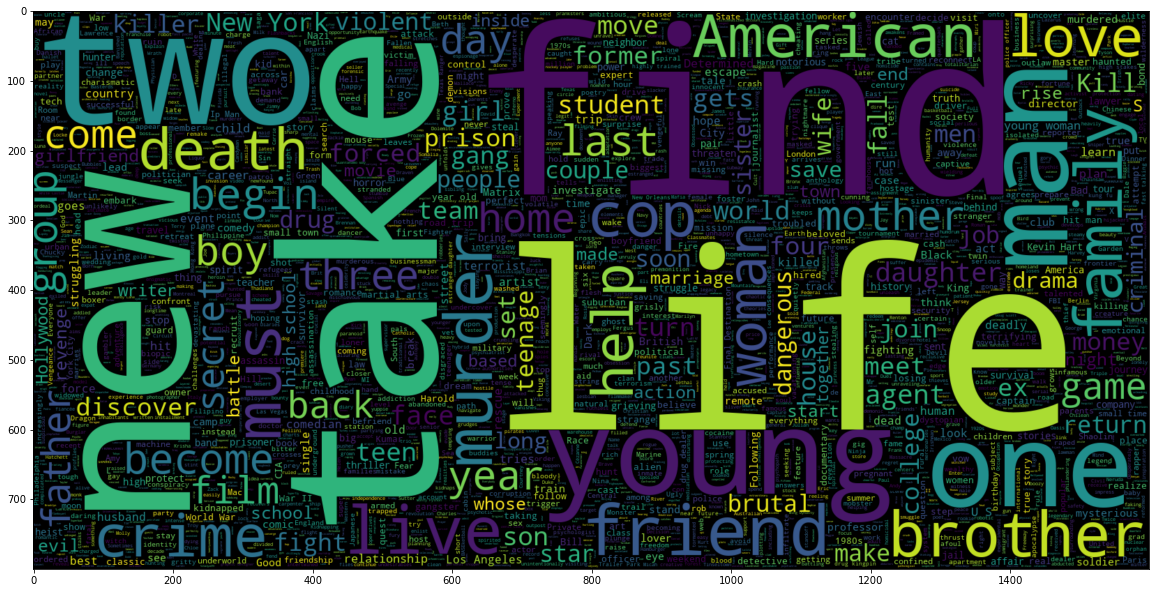

In [262]:
plt.figure(figsize = (20,20))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(train_true)))
plt.imshow(wc,interpolation = 'bilinear')

In [263]:
text_true = wc.process_text(str(" ".join(train_true))) # Getting the most frequently used words from wordcloud 
list(text_true.keys())[:10]

['dystopian',
 'future',
 'insurance',
 'adjuster',
 'tech',
 'company',
 'robot',
 'killed',
 'violating',
 'protocol']

In [264]:
len(text_true.keys())

3644

In [265]:
text_true = sorted(text_true.items(),key = 
             lambda kv:(kv[1], kv[0]))

In [266]:
ans_true = []
for i in text_true:
    ans_true.append(i[0])
ans_true [:5] 

['10th', '11th', '13th', '14th', '15k']

In [267]:
predictions = []
for i in test_text:
    x = i.split()
    for j in x:
        if j in ans_true:
            predictions.append(1)
            break
        else:
            predictions.append(0)
            break
len(predictions)
len(test_category)
count = 0
for i in range(len(predictions)):
    test_category = list(test_category)
    if(predictions[i] == int(test_category[i])):
        count += 1
print(count)
accuracy = (count/len(predictions))*100
accuracy

66


84.61538461538461

In [268]:
print("Accuracy using WordCloud is :", accuracy , "%")

Accuracy using WordCloud is : 84.61538461538461 %


In [270]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

AttributeError: 'set' object has no attribute 'words'

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
            final_text.append(word.lower())
    return final_text 
movies.text = movies.text.apply(lemmatize_words)

In [ ]:
def join_text(text):
    string = ''
    for i in text:
        string += i.strip() +' '
    return string
movies.text = movies.text.apply(join_text)

In [ ]:
train_message = movies.text[:3600]
test_message = movies.text[3600:]
train_category = movies.rating[:3600]
test_category = movies.rating[3600:]

In [ ]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,2))
#transformed train reviews
cv_train_reviews=cv.fit_transform(train_message)
#transformed test reviews
cv_test_reviews=cv.transform(test_message)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

In [ ]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,2))
#transformed train reviews
tv_train_reviews=tv.fit_transform(train_message)
#transformed test reviews
tv_test_reviews=tv.transform(test_message)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

In [ ]:
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_category)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_category)
print(lr_tfidf)

In [ ]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)

In [ ]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_category,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_category,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

In [ ]:
#Classification report for bag of words
lr_bow_report=classification_report(test_category,lr_bow_predict,target_names=['0','1'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_category,lr_tfidf_predict,target_names=['0','1'])
print(lr_tfidf_report)

In [ ]:
plot_confusion_matrix(lr_bow, cv_test_reviews, test_category,display_labels=['0','1'],cmap="Blues",values_format = '')
plot_confusion_matrix(lr_tfidf, tv_test_reviews, test_category,display_labels=['0','1'],cmap="Blues",values_format = '')

In [ ]:
#training the model
mnb=MultinomialNB()
#fitting the nb for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_category)
print(mnb_bow)
#fitting the nb for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_category)
print(mnb_tfidf)

In [ ]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)

In [ ]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_category,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_category,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

In [ ]:
mnb_bow_report = classification_report(test_category,mnb_bow_predict,target_names = ['0','1'])
print(mnb_bow_report)
mnb_tfidf_report = classification_report(test_category,mnb_tfidf_predict,target_names = ['0','1'])
print(mnb_tfidf_report)

In [ ]:
plot_confusion_matrix(mnb_bow, cv_test_reviews, test_category,display_labels=['0','1'],cmap="Blues",values_format = '')
plot_confusion_matrix(mnb_tfidf, tv_test_reviews, test_category,display_labels=['0','1'],cmap="Blues",values_format = '')

In [ ]:
model = Sequential()
model.add(Dense(units = 128 , activation = 'relu' , input_dim = cv_train_reviews.shape[1]))
model.add(Dense(units = 64 , activation = 'relu'))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(units = 16 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

In [ ]:

epochs = [i for i in range(3)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()